# Prediction surface for KNN regression on Advertising Dataset

I was reading "An Introduction to Statistical Learning: With Applications in R" and I like the plots in the book, but no explanation on how to obtain them is present. I took the freedom to recreate many of those plots by myself. You can find the corresponding analysis in the book, for this little project I wanted to fit a KNN regression model with 10x10 fold CV and plot a prediction surface like the one in the book. Also a grid search for the best hyperparameter k. Enjoy.

⚠️ Note: This notebook relies on a dataset that is no longer available. Do not re-run unless you provide your own dataset.

,X,TV,radio,newspaper,sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


,TV,radio,sales
,<dbl>,<dbl>,<dbl>
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9
6,8.7,48.9,7.2


            Length Class      Mode     
learn       2      -none-     list     
k           1      -none-     numeric  
theDots     0      -none-     list     
xNames      2      -none-     character
problemType 1      -none-     character
tuneValue   1      data.frame list     
obsLevels   1      -none-     logical  
param       0      -none-     list     

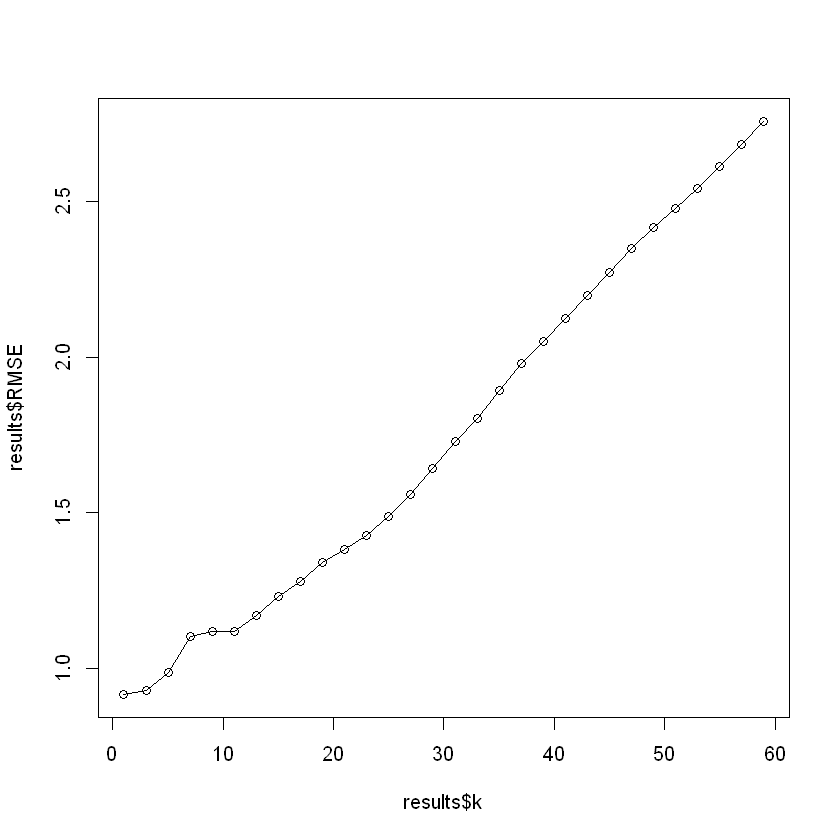

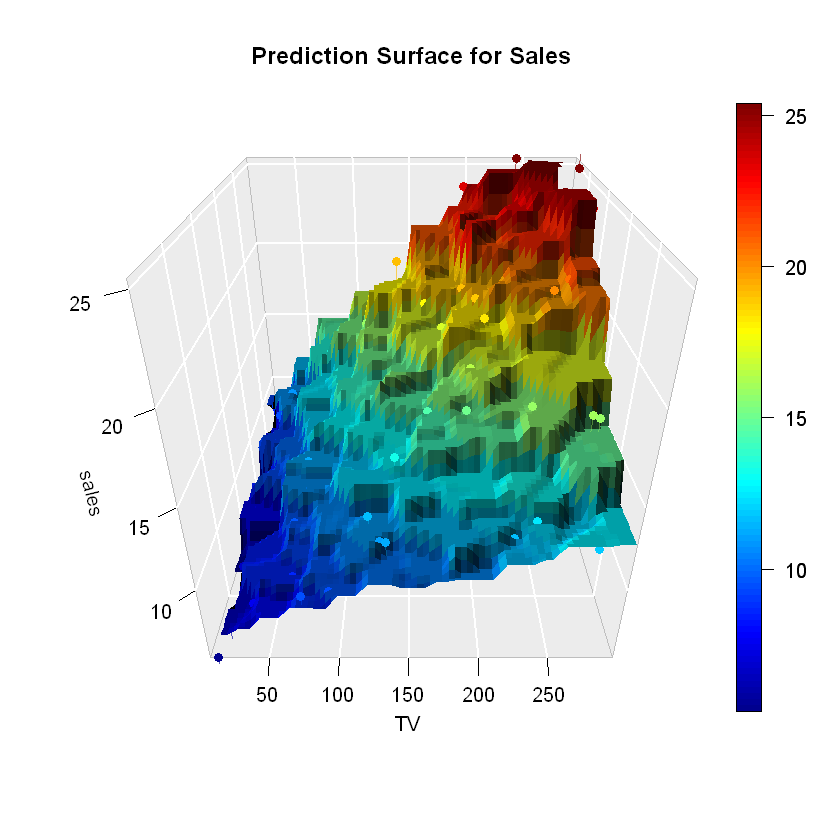

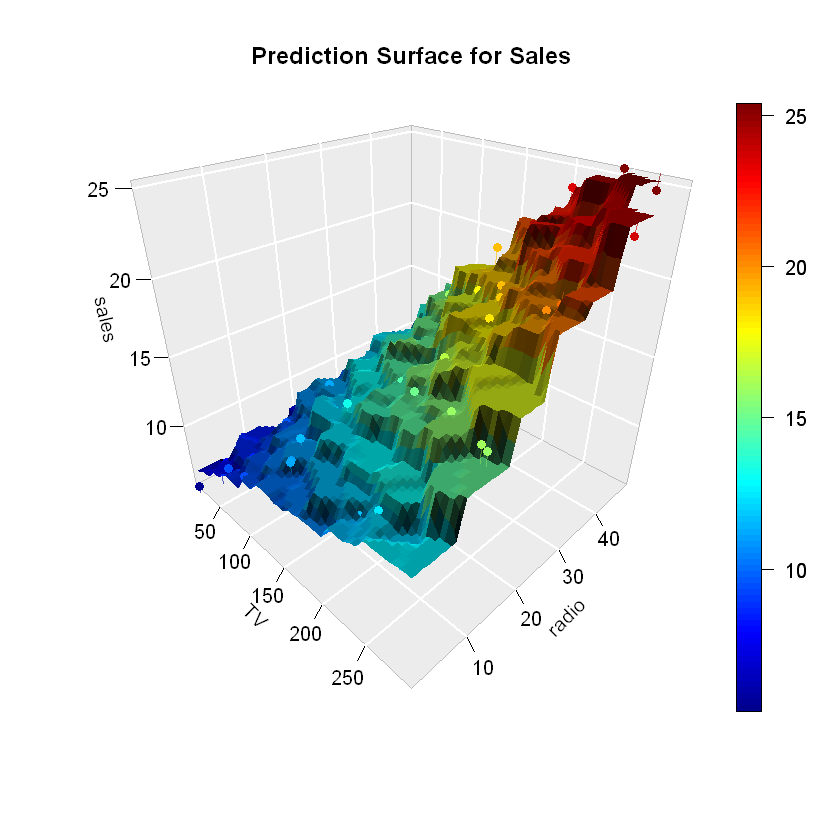

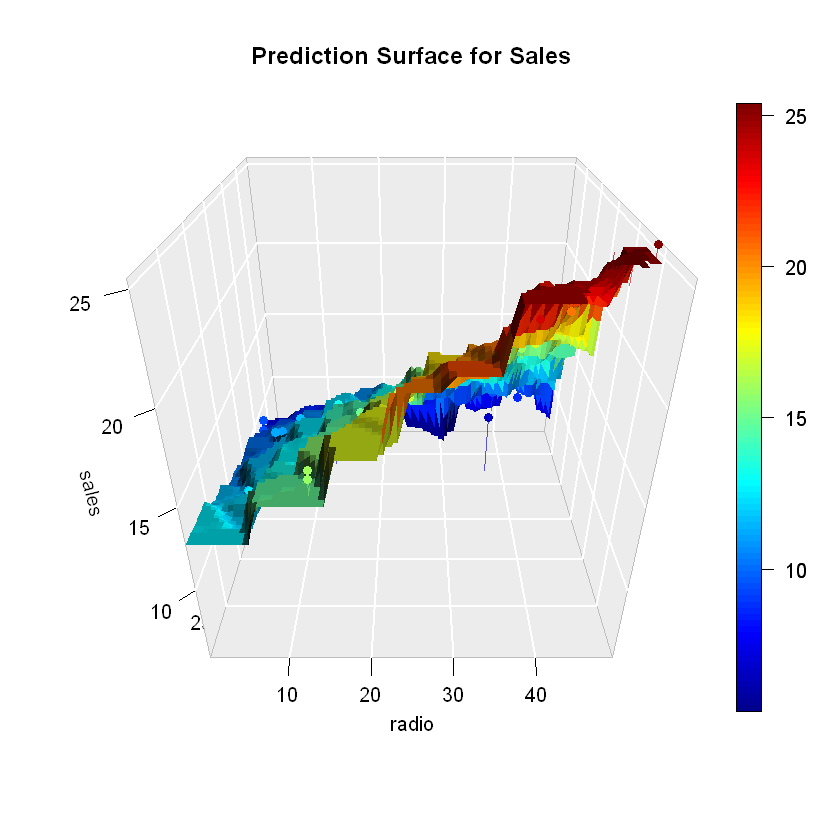

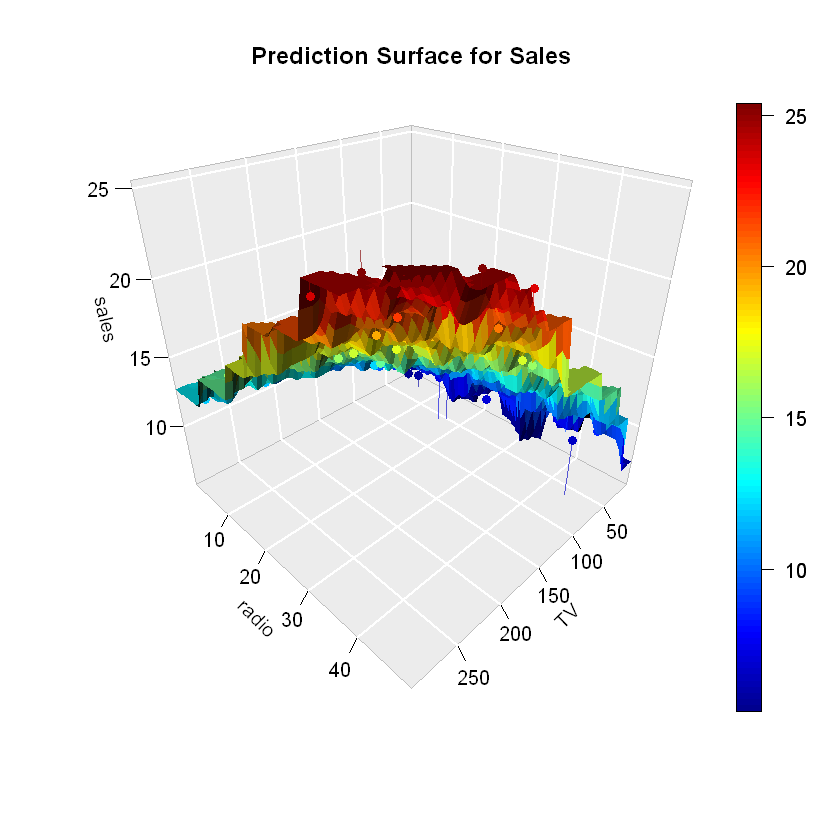

In [ ]:
library(tidyverse)
library(caret)
library(plot3D)

data <- read.csv("data")

head(data)

data <- data %>%
  select(-X, -newspaper)

head(data)

#plot(data)

set.seed(4)
inTrain <- createDataPartition(data$sales, p = 0.7, list = FALSE)
training <- data[inTrain, ]
test <- data[-inTrain, ]

tuneGrid <- expand.grid(k = seq(1, 59, by = 2))

set.seed(4)
knn_reg_fit <- train(sales ~ ., data = training, method = "knn",
      preProcess = c("center", "scale"),
      trControl = trainControl(method = "repeatedcv", number = 10, repeats = 10),
      tuneGrid = tuneGrid)

summary(knn_reg_fit)

results <- knn_reg_fit$results

# K vs RMSE plot
plot(results$k, results$RMSE, type = "o")

pred <- predict(knn_reg_fit, test)

test_2 <- test %>%
  mutate(pred = pred)



# Plot___________________
x <- test_2$TV
y <- test_2$radio
z <- test_2$sales

grid.lines = 70
TV <- seq(min(x), max(x), length.out = grid.lines)
radio <- seq(min(y), max(y), length.out = grid.lines)
xy <- expand.grid( TV = TV, radio = radio)
z_pred <- matrix(predict(knn_reg_fit, newdata = xy),
                 nrow = grid.lines, ncol = grid.lines)

fitpoints <- predict(knn_reg_fit)

#scatter3D(x, y, z, surf = list(x = TV, y = radio, z = z_pred),
#          phi = 0, theta = 0)
#scatter3D(x, y, z, surf = list(x = TV, y = radio, z = z_pred),
#          phi = 0, theta = 45)
#surface3d(x, y, z_pred, color = "red", alpha = 0.6)

plot_scatter_3D <- function(theta) {
 for(i in theta) {
   scatter3D(x, y, z, surf = list(x = TV, y = radio, z = z_pred, fit = test_2$pred, shade = 0.6),
             phi = 30, theta = i, xlab = "TV", ylab = "radio",
             zlab = "sales", alpha = 0.4, pch = 16, bty = "g",
             ticktype = "detailed", main = "Prediction Surface for Sales")

   points3D(x, y, z, pch = 16, color = "black", add = TRUE)
 }
}

plot_scatter_3D(c(0, 45, 90, 135))

Where would you allocate the budget for marketing in this case by only looking at this plot? Radio alongside TV have good synergy. How would marketing over the internet perform against these two? That is a good question.